In [11]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#packages
import scipy.stats as stats

from scipy.stats import expon
from scipy.stats import gaussian_kde

import numpy as np

#thinkstats data
import nsfg
import brfss

#thinkstats modules
import first
import analytic
import thinkstats2
import thinkplot
import density

from collections import Counter
import math



# Chapter 1: Exploratory Data analysis

## 1.4 DataFrames

In [2]:
# 1.4 DataFrames

df = nsfg.ReadFemPreg()
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


In [4]:
# display columns
df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [5]:
#index in columns
df.columns[1]

'pregordr'

In [11]:
# access columns, using columns name as key

pregordr = df['pregordr']
type(pregordr)

#series are like a python list, and also provide indicies and corresponding values

pandas.core.series.Series

In [16]:
pregordr

#use integer indicies and slices from 0:len(pregordr) to access elements of a series
#pregordr[0] or pregordr[2:5]

#result of index operater is an int64
# result of slice is another Series

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [18]:
#Another way to access columns!

pregordr = df.pregordr
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

1.5 Variables: 
* be familiar with the variables assigned and how they are conducted

1.5 Transformations
* converting data into a dataframe, special values, and performing calculations will require data cleaning. 
* for example, replacing speacial values with Nan values (np.nan) for logical calculations
* adding new columns == df['columns_name']

1.7 Validation
* Careful not to interpret data incorrectly (in this case taking data from another statistical software)
* If you take time to validate the data, you can save time later and avoid errors

How? 
* compute vasic statistics and compare with published results


In [21]:
# Validating the outcome Series compared to the nsfg codebook

df.outcome.value_counts().sort_index()

# in here, the result is the outcome Series; sort_index() sorts the Series by index so values appear in order

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [28]:
df.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

## Ch 1 Excercise Thoughts: 
* went through the problems well. mostly just understanding the power of `value_counts().sort_index()`    
* understanding how to access columns and their indexes
* how to add or updated columns

Understand how functions are created and feed into creating our dataframes, variables, when cleaning through transformations, and validating that all our stuff is good. 

# Chapter 2: Distributions

### Histograms
Will try to commit to not using the book's module

Different ways to create dictionaries. Easiest way to get frequencies of numbers stored for a histogram: 
* not listed below, but `value_counts` an option for pandas method

In [46]:
#exmaples: using for loop to iterate through a list

x = [1,2,2,3,4,5]

hist_x = dict()
for elem in x:
    hist_x[elem] = hist_x.get(elem,0) + 1
hist_x

{1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

In [43]:
# Using Collections.Counter

hist_counter = Counter(x)
hist_counter

Counter({1: 1, 2: 2, 3: 1, 4: 1, 5: 1})

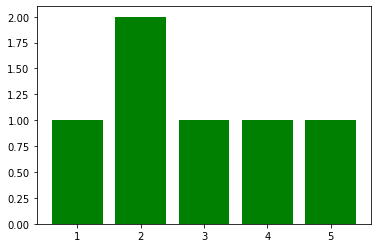

In [56]:
plt.bar(list(hist_x.keys()), hist_x.values(), color='g')
plt.show()

### Representing and Plotting Histograms

first run thourgh with his module

In [47]:
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

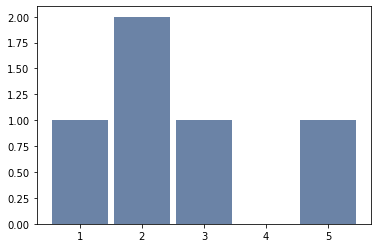

In [57]:
thinkplot.Hist(hist)
plt.show()

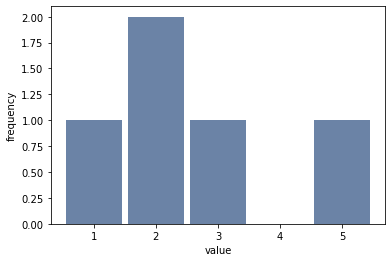

<Figure size 576x432 with 0 Axes>

In [49]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

### NSFG Variables

Histograms helps to take a first look at your variables

In [59]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Histogram for Live `birthwgt_lb`

Reflects similiar to a normal distribution (Gaussian distribution). 
But, this one is asymmetric with a tail extending father left compared to the right side. 

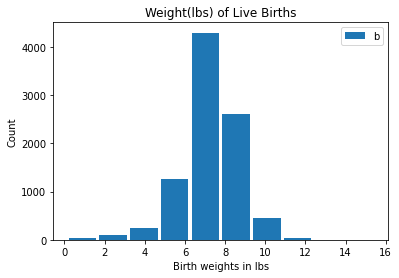

In [81]:
plt.hist(live.totalwgt_lb, rwidth=0.90)

plt.title("Weight(lbs) of Live Births")
plt.legend("birthwgt_lb")
plt.xlabel("Birth weights in lbs")
plt.ylabel("Count")
plt.show()

Histogram of `agepreg` (the mother's age at the end of pregancy)

Distribution roughly bell-shaped, but tails to the right than left. Most mothers in 20s than in 30s.

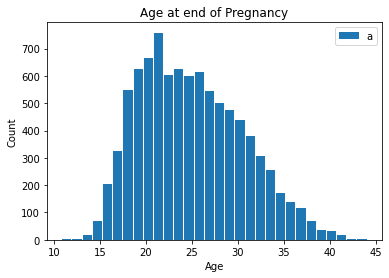

In [89]:
plt.hist(live.agepreg,bins=30, rwidth=0.90)

plt.title("Age at end of Pregnancy")
plt.legend("agepreg")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Histogram for `prglength`

By far, most common length is 39 weeks (~9 months). Left tail is longer where early babies are common, but not going past 43 days requiring doctor intervention. 

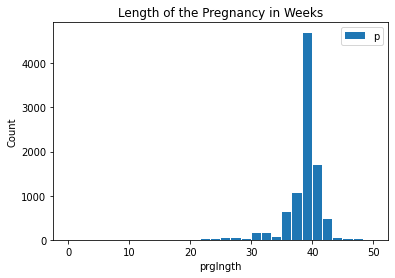

In [94]:
plt.hist(live.prglngth, bins=30, rwidth=0.90)

plt.title("Length of the Pregnancy in Weeks")
plt.legend("prglngth")
plt.xlabel("prglngth")
plt.ylabel("Count")
plt.show()

In [ ]:
#investigating further for the specific weeks
live.prglngth.value_counts().sort_index()

### 2.5 Outliers

Shape and common values are easy to identify! But how to find rare values? 

Check for outliers: 
* Check for the largest and smallest in a hist

In [103]:
live_preg_lngth = live.prglngth

In [120]:
#need to create dictionary for frequencies to review

live_prg_d = dict()

for elem in live_preg_lngth:
    live_prg_d[elem] = live_prg_d.get(elem,0) + 1
    
live_prg_d

{39: 4693,
 38: 607,
 40: 1116,
 42: 328,
 35: 311,
 37: 455,
 33: 49,
 41: 587,
 36: 321,
 43: 148,
 9: 1,
 32: 115,
 24: 13,
 44: 46,
 30: 138,
 28: 32,
 31: 27,
 34: 60,
 18: 1,
 26: 35,
 20: 1,
 45: 10,
 25: 3,
 27: 3,
 48: 7,
 29: 21,
 4: 1,
 50: 2,
 22: 7,
 0: 1,
 19: 1,
 21: 2,
 17: 2,
 47: 1,
 13: 1,
 23: 1,
 46: 1}

In [117]:
# Sort dictionary for smallest frequencies
smallest = sorted(live_prg_d.items(), reverse=False)[:10]


#iterate through dictionary
for weeks, freq in smallest:
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [119]:
largest = sorted(live_prg_d.items(), reverse=True)[:7]

for weeks, freq in largest:
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148


Best way to handle outliers depends on "domain knowledge", that is, information about where the data comes from and what they mean. And the analysis you plan on. 

### 2.6 First Babies

Finally, let's try comparing distribution of preg lengths for first babies compared to others. 

In [217]:
# create dataframes of live births for comparison

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

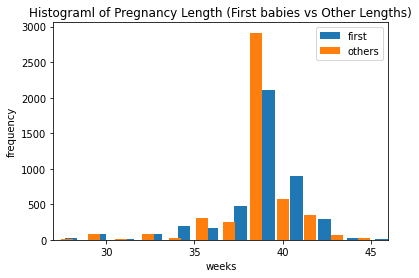

In [216]:
first_hist  = plt.hist(firsts['prglngth'], bins=30, rwidth = 0.45, label='first')
others_hist = plt.hist(others['prglngth'], bins=30, rwidth = 0.45, label = 'others')

plt.xticks([0,30,35,40,45])
plt.xlim([27,46])

plt.title("Histograml of Pregnancy Length (First babies vs Other Lengths)")
plt.ylabel("frequency")
plt.xlabel("weeks")

plt.legend()
plt.show()

Histograms useful to immediately show most freq. values, but at least here it's difficult to compare with the smaller sample size of first babies compared to the others. 

Which is why we can address this problem using probability mass functions!

### 2.7 Summarizing distributions and Variance

Further summarizing details of a histogram with some descriptive statistics
* central tendency - do values tend to cluster around a particular point?
* modes - is there more than one cluster?
* spread - how much variability is there in the values?
* tails - how quickly do probailities drop off as we move away from modes?
* outliers - are there extreme values far from the modes?


**TODO: Difference between Mean and Average formulas and context**

Mean: If you have a sample of $n$ values, $x_{i}$, the mean, $\hat{x}$, is the sum of the values divided by the number of values

$$\hat{x} = \frac{1}{n} \sum_{i} x_{i}$$

In [230]:
# Pandas data structure provides methods for these:

mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print(" mean: %s,\n var: %s,\n std: %s" % (mean, var, std))

 mean: 38.56055968517709,
 var: 7.302662067826817,
 std: 2.702343810070587


Mean preg length is 38.6 weeks, with std of 2.7 weeks (so we expect deviations of 2-3 weeks)

Var remember is unts^2, so may not be helpful sometimes

In [231]:
live.prglngth.describe()

count    9148.000000
mean       38.560560
std         2.702344
min         0.000000
25%        39.000000
50%        39.000000
75%        39.000000
max        50.000000
Name: prglngth, dtype: float64

### 2.9 Effect Size

Convey the size of the effect by comparing the difference between groups to the variability within groups. Or describe the difference between two groups by difference in the means.

Cohen's $d$ statistics: 

$$d = \frac{ \overline{x_{1}} - \overline{x_{2}}}{s} $$

In [237]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [239]:
CohenEffectSize(firsts.prglngth, others.prglngth)

#difference in means is 0.029 std

0.028879044654449834

**Reporting Results**

Answer depends on who is asking the question. These differents might matter to a specific audiences trying to look at any (real) effect, no matter how small. Or someone else might need effects that are **clinically significant**

# Chapter 3: Probability Mass Functions

### 3.1 Pmfs

representing distribution as probability mass function
* maps each value to it's probability and divided by sample size(n) for normalization

Exmaple for creating PMF for `birthwgt_lb`

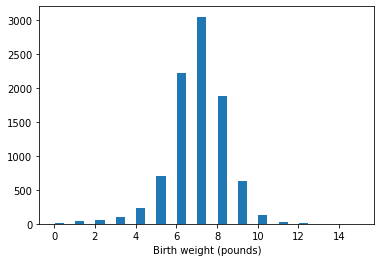

In [270]:
# dict of frequency

birthwght_dict = dict()

for elem in live.birthwgt_lb:
    birthwght_dict[elem] = birthwght_dict.get(elem,0) + 1
    
plt.hist(live.birthwgt_lb, bins=30, rwidth=0.90)
plt.xlabel("Birth weight (pounds)")
plt.show()

In [266]:
# from dict of frequencies, map for probability

n = sum(birthwght_dict.values())
birthwgt_pmf = {}

for x, freq in birthwght_dict.items():
    birthwgt_pmf[x] = freq /n
    
birthwgt_pmf 
n

9148

<BarContainer object of 80 artists>

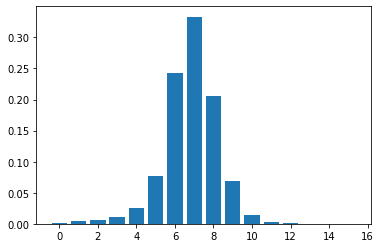

In [269]:
plt.bar(birthwgt_pmf.keys(),birthwgt_pmf.values())

### 3.2 Plotting PMFs

By plotting PMFs instead of hist, we can compare two distrubutions without being misled by dif in sample size

Let's create PMF of pregnancy lengths for first babies and others, using bar graphs and step functions. 

this method is dependent on creating my own dictionaries instead of creating a new df.column with probaility frequencies if I were to make my own table of just value_counts for each value

`prglngth`

In [ ]:
# Dict for pregnancy lengths for first babies

first_d = dict()

for x in firsts.prglngth: 
    first_d[x] = first_d.get(x,0) + 1

print("Dictionary \n",first_d)

#then create mapping for float-point probabilities
n = sum(first_d.values())
first_pmf = {}

for x, freq in first_d.items():
    first_pmf[x] = freq/n
    
print("PMF of First Babies \n",first_pmf)

In [ ]:
# Dict for pregnancy lengths for others babies

other_d = dict()

for x in others.prglngth: 
    other_d[x] = other_d.get(x,0) + 1

print("Dictionary \n",other_d)

#then create mapping for float-point probabilities
others_n = sum(other_d.values())
other_pmf = {}

for x, freq in other_d.items():
    other_pmf[x] = freq/others_n
    
print("PMF of 'Other' Babies \n",other_pmf)

In [314]:
#Another way to create PMF series

pmf_others = others.prglngth.value_counts().sort_index() / len(others.prglngth)
pmf_firsts = firsts.prglngth.value_counts().sort_index() / len(firsts.prglngth)

Now, plot both PMFs!

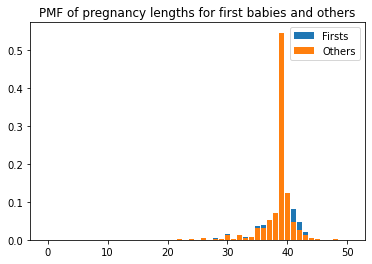

In [326]:
#Having to use ThinkStats method of dictionaries and plotting with bar graph

plt.bar(list(first_pmf.keys()), first_pmf.values(), label="Firsts")
plt.bar(list(other_pmf.keys()), other_pmf.values(), label="Others") 

plt.title("PMF of pregnancy lengths for first babies and others")
plt.legend()
plt.show()

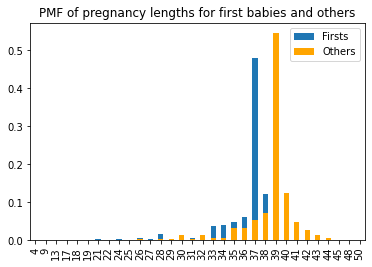

In [329]:
# Using my pandas series of frequencies with Hist plot

pmf_firsts.plot(kind="bar", label="Firsts")
pmf_others.plot(kind="bar", label="Others", color="orange")

plt.title("PMF of pregnancy lengths for first babies and others")
plt.legend()
plt.show()

In [330]:
# Too hard to make step graph (ploting lines for PMF)

# Chapter 4: Cumulative Distribution Functions

## 4.1 Limits to PMFs

PMFs work well if number of values is small. 
As num of values increase, the probability associated with each value gets smaller and effect of random noise increases.

* Makes it hard to notice meaningful features

Solution: Bin data, dividing the range of values into non-overlapping intervals and counting the num of values in each bin. 

## 4.2 Percentiles

Exmaple: Standardized testing with a raw score and a percentile rank

In [332]:
#function to compute Percentile Rank

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count +=1
    percentile_rank = 100.0 * (count / len(scores))

Difference between `percentile` and `percentile_rank`
* `PercentileRank` takes a value and compute its percentile rank in a set of values
* `Percenitle` takes a percentile rank and compute the corresponding value

## 4.3 CDFs

Cumulative distribution function: maps from a value to its percentile rank.

CDF(x) evaluates for a particular value of x the fraction of values in the distribution less than or equal to x.

In [102]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile_scores(scores, percentile_rank):
    """
    Args: scores is a Series
    
    returns: corresponding values to percentile
    """
    scores.sort_values()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score
        
def Percentile2(scores, percentile_rank):
    scores.sort_values()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [68]:
def EvalCdf(sample, x):
    """
    Args: sample and CDF(X)
    
    returns: probaility in range 0-1 for CDF(x)
    """
    
    #get counts for all values less than or equal to x
    count = 0.0
    for value in sample:
        if value <= x:
            count+=1
    
    # return probability 
    prob = count / len(sample)
    return prob
    #will provide a probability in the range of 0-1

## 4.4 Representing CDFs

Going through all I've learned so far with Distributions to create a Cumulative Density Function for Live Birth Prengnacy Lengths in weeks. 

In [4]:
# Re-load data
preg = nsfg.ReadFemPreg()

live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

assert len(live) == 9148
assert len(firsts) == 4413
assert len(others) == 4735

Using dictionaries, created a histogram for frequencies of `prglngth`

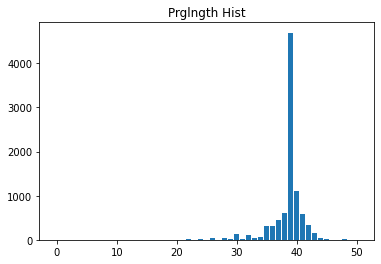

In [5]:
# dict of frequency

prglngth_hist = dict()

for elem in live.prglngth:
    prglngth_hist[elem] = prglngth_hist.get(elem,0) + 1

#checking values
plt.bar(list(prglngth_hist.keys()), prglngth_hist.values(), label="Prg Lengths")
plt.title("Prglngth Hist")
plt.show()

#if neededing specific numbers
#live.prglngth.value_counts().sort_index()

From this dictionary of frequencies, map freq values to their probability from 0-1

0.9999999999999997


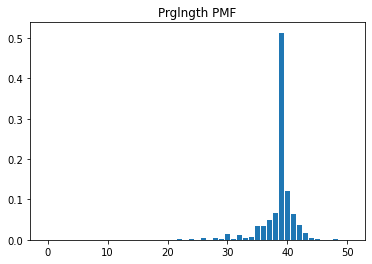

In [9]:
# from dict of frequencies, map for probability

Y = sum(prglngth_hist.values())
prglngth_pmf = {}

for x, freq in prglngth_hist.items():
    prglngth_pmf[x] = freq /Y
    
print(sum(prglngth_pmf.values()))

plt.bar(list(prglngth_pmf.keys()), prglngth_pmf.values(), label="Prg Lengths")
plt.title("Prglngth PMF")
plt.show()


Creating CDF where range is 0-1.

Using numpy for CDF.

* Compute the number of data points, n, using the len() function.
* The x-values are the sorted data. Use the np.sort() function to perform the sorting.
* The y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
* The function returns the values x and y.

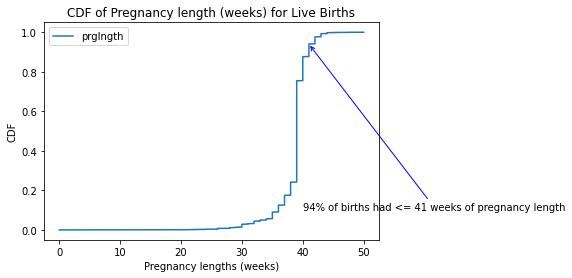

In [10]:
prglngth_x = np.sort(live.prglngth)
prglngth_y = np.arange(1, len(prglngth_x)+1) / len(prglngth_x)

plt.plot(prglngth_x, prglngth_y, label="prglngth")


plt.annotate('94% of births had <= 41 weeks of pregnancy length', xy=(41, .94),xytext=(40, 0.1), fontsize=10, arrowprops=dict(arrowstyle="->", color='b'))

plt.title("CDF of Pregnancy length (weeks) for Live Births")
plt.xlabel("Pregnancy lengths (weeks)")
plt.ylabel("CDF")
plt.legend(loc= "upper left")

plt.show()

In [13]:
def cdf(sample, label=None):
    x = np.sort(sample)
    y = 1 * np.arange(len(sample)) / (len(sample) - 1)
    plt.plot(x, y, label=label)

Find probability given a value. Prglngth at 41 weeks

In [69]:
EvalCdf(live.prglngth, 41)

0.9406427634455619

Find the corresponding value given a fraction. Evlautating the inverse CDF at median for 0.5

In [103]:
Percentile_scores(live.prglngth, 0.5)

39

TODO: Will need to look into better ways or methods to get CDF values and probabilities. but the math is here and enough to keep moving. 

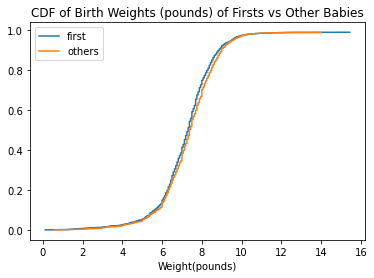

In [117]:
cdf(firsts.totalwgt_lb, "first")
cdf(others.totalwgt_lb, "others")

plt.title("CDF of Birth Weights (pounds) of Firsts vs Other Babies")
plt.xlabel("Weight(pounds)")
plt.legend()
plt.show()

In this exmaple, first babies are slightly, but consistenly, lighter than others.

### 4.6 Percentile-based statistics

After computing CDF, easy to compute percentile rank and percentiles for percentile-based summary statistics

### 4.7 Random numbers

# Chapter 5 Modeling Distributions

So far we used empirical distributions based on empirical observations (finite samples). 

**Analytics Distribution** are used to model empirical distributions. 
* model - simplification that leaves out uneeded details

## 5.1 Exponential Distribution

Calculate my own exponential distribution.

Resource: https://www.youtube.com/watch?v=g3viPcoykig&t=319s

In [ ]:
def exponential_pdf(x,lam):
    return lam * np.exp(-lam * x)

exponential_pdf(np.array([1,2,3]), 2)

array([0.27067057, 0.03663128, 0.0049575 ])

In [ ]:
def exponential_cdf(x, lam):
    return 1 - np.exp(-lam *x)

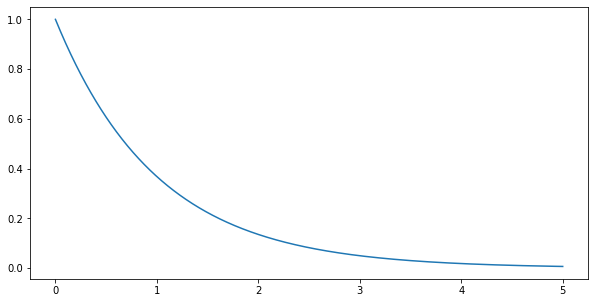

In [159]:
x = np.linspace(0,5,1000)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, exponential_pdf(x,1), label="Exponential PDF")
plt.show()

Writing out cdf function

$$CDF(x) = 1 − e−λx$$

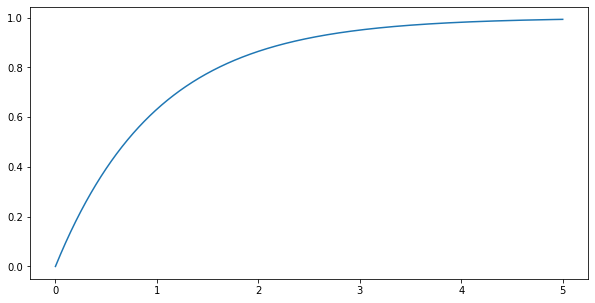

In [ ]:
x = np.linspace(0,5,1000)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, exponential_cdf(x,1))
plt.show()

Exponential Distribution using `from scipy.stats import expon`

In [ ]:
#using expon. Careful: Scale in mu = 1/lambda

x = np.array([1,2,3])
expon.pdf(x, loc=0,scale=1/2)

array([0.27067057, 0.03663128, 0.0049575 ])

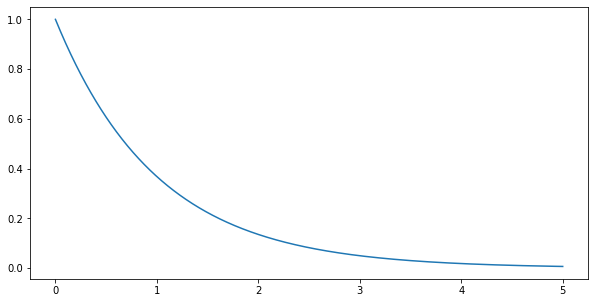

In [ ]:
x = np.linspace(0,5,1000)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, expon.pdf(x,loc=0,scale=1))
plt.show()

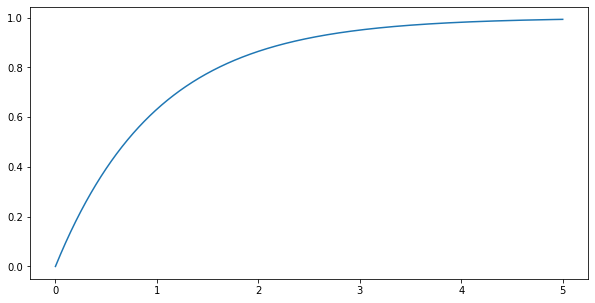

In [ ]:
x = np.linspace(0,5,1000)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, expon.cdf(x,loc=0, scale=1))
plt.show()

Creating exponential random variates for a histogram, and fitting an exponential histogram

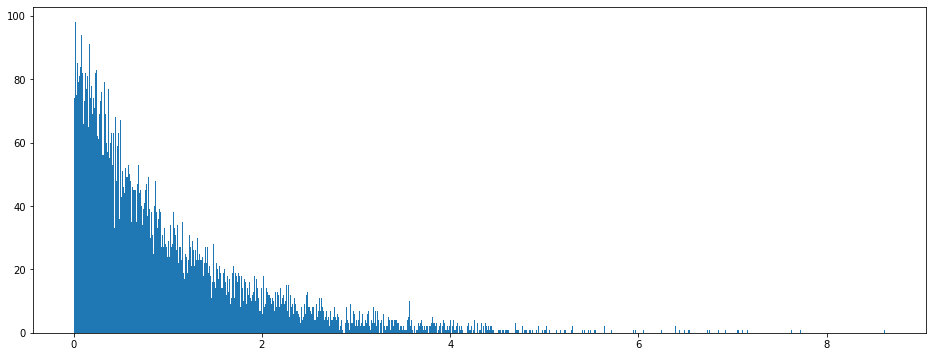

In [ ]:
#creating random variates from scipy.exp

x_rvs = expon.rvs(loc=0, scale=1, size=10000, random_state=3)

fig,ax = plt.subplots(figsize=(16,6))
ax.hist(x_rvs, bins=1000)
plt.show()

In [ ]:
loc, scale = expon.fit(x_rvs)

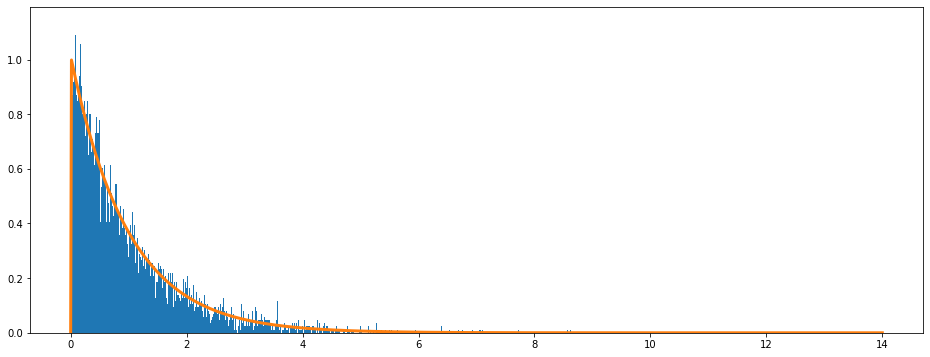

In [ ]:
x = np.linspace(0,14,1000)
fig,ax = plt.subplots(figsize=(16,6))
ax.hist(x_rvs,bins=1000, density=True)
ax.plot(x,expon.pdf(x, loc=loc, scale=scale), lw=3)
plt.show()

In [ ]:
print(expon.mean(loc=loc, scale=scale))
print(expon.median(loc=loc, scale=scale))
print(expon.var(loc=loc, scale=scale))
print(expon.std(loc=loc, scale=scale))

0.9876482168373847
0.6845900985922615
0.9754198929651927
0.9876334810875909


**Thinkstats stuff** 

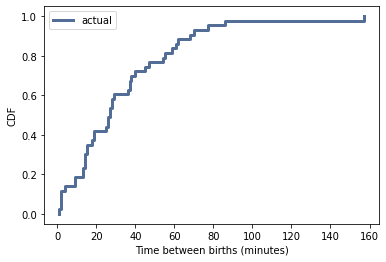

In [ ]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time between births (minutes)', ylabel='CDF')

In [ ]:
df.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In exponential distribution, we can think of probability as the interarrival times inbetween births for probability of baby births by minutes at this hospital.

* minutes: time of birth converted to minutes since midnight

In [ ]:
#difference between consecutive birth times
diffs = df.minutes.diff().sort_values().fillna(0.0)

/var/folders/nd/2hwdbgt95fv2qql2n5f1y09c0000gn/T/ipykernel_1508/133335088.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H,X1 = np.histogram( diffs, normed = True )


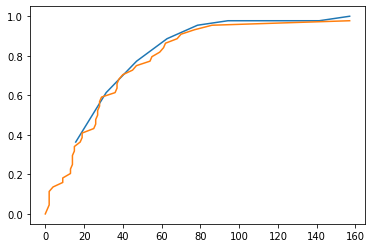

In [ ]:
# Create CDF (from stackoverflow)

N = len(diffs)

# method 1
H,X1 = np.histogram( diffs, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(diffs)
F2 = np.array(range(N))/float(N)

plt.plot(X1[1:], F1)
plt.plot(X2, F2)
plt.show()

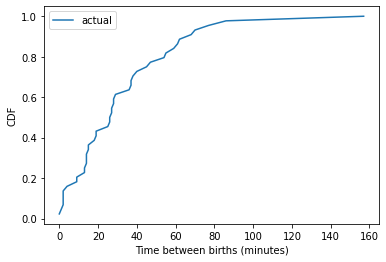

In [ ]:
#My CDF code from previous for the Actual CDF, and above displaying actual with model. 

bx = np.sort(diffs)
by = np.arange(1, len(bx)+1) / len(bx)

plt.plot(bx, by, label='actual')

plt.xlabel('Time between births (minutes)')
plt.ylabel('CDF')
plt.legend()
plt.show()

Create Exponential Distribution for interrarival birth times from actual data is proving difficult to create log-y scale for my variables. But in an exponential model, it is possible, just doesn't look very good with this small data.

Understand that lmbda is interpreted as the rate (num of events that occur) on average in a unit of time in this exmaple. 44 babies are born in 24 hours, so the rate is lambda = 0.0306 births per minute. The mean of an exponential distribution is 1/lambda, so the mean time between births if 32.7 minutes. 

## 5.2 Normal Distribution

### Normal distribution
Using scipy stats and numpy for probability distributions

resource: https://levelup.gitconnected.com/probability-distributions-using-scipy-58fdab53d7ac

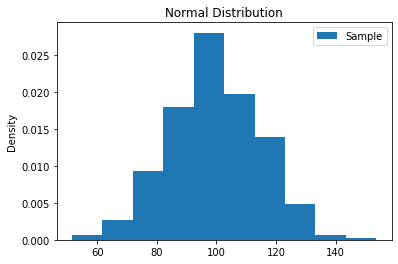

In [112]:
# Continuous Distributions

# creating instance of stats.norm class and initialize object with mean = 100 and std = 15
normal = stats.norm(loc=100, scale=15)

#generate random sample with 1000 random numbers and reproducible random results
normal_sample = normal.rvs(size=1000, random_state=123)
plt.hist(normal_sample, density=True, label="Sample")
plt.title("Normal Distribution")
plt.ylabel("Density")
plt.legend()
plt.show()

In [107]:
#Proability Density Function

#able to access PDF method
print(normal.pdf(120))
print(normal.pdf([120,130,140]))

0.010934004978399577
[0.010934   0.0035994  0.00075973]


Plotting PDF

Need to create values for horizontal axis with `np.linespace` for eqully num spaced numbers between `start` and `end`. 

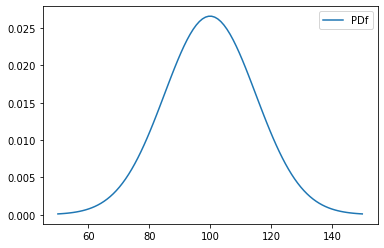

In [169]:
#create values for horizontal axis
t = np.linspace(50,150,100)

#Plt with vertical(y) values from `normal.pdf(t)`
plt.plot(t, normal.pdf(t),label='PDf')

plt.legend()
plt.show()

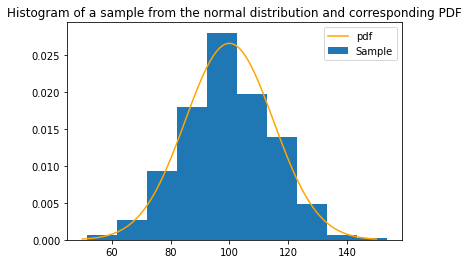

In [170]:
plt.plot(t, normal.pdf(t),label='pdf', color='orange')
plt.hist(normal_sample, density=True, label="Sample")

plt.title("Histogram of a sample from the normal distribution and corresponding PDF")
plt.legend()
plt.show()

### Normal Cumulative Distribution Function (Normal CDF) for Birth weights from NSFG

Focusing on the abserved CDF and model. Model ends up fitting data well except in the left tail. 

In [136]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

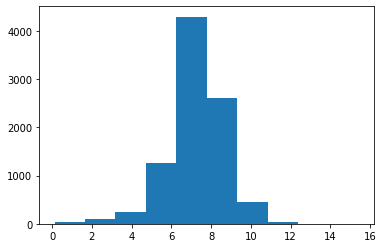

In [137]:
plt.hist(weights)
plt.show()

In [152]:
#Preparing for the model

#trim largest and smallest elements of weights
p=0.01
weight_n = int(p*len(weights))
tw = sorted(weights)[weight_n:-weight_n]


In [143]:
#compute mean and variance of a sequence of numbers

ddof = 0 #delta degree of freedom
tw = np.asarray(tw)
mean = tw.mean()

ds = tw - mean
var = np.dot(ds,ds) / len(tw) - ddof

sigma = np.sqrt(var)

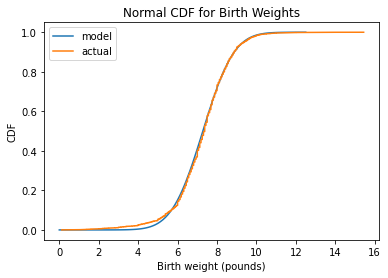

In [160]:
#plot model 

w_x = np.linspace(0, 12.5, 101)
w_p = stats.norm.cdf(w_x, mean, sigma)

plt.plot(w_x, w_p, label='model')

# Plot the data
wx = np.sort(weights)
wy = np.arange(1, len(wx)+1) / len(wx)

plt.plot(wx, wy, label='actual')

plt.title('Normal CDF for Birth Weights')
plt.xlabel("Birth weight (pounds)")
plt.ylabel('CDF')
plt.legend()
plt.show()

## Why Model?

* Found preferencital attachment interesting
* Excercises were cool, would be good to go back to go further if I wanted to after finishing this book

# Chapter 6 Probability Density Functions

## 6.1 PDFs

(Probability density function)

* the derivative of a CDF
* Refer to notes I got on CDF, PDF, and PMF

### Working with BFRSS data. Create model of Normal PDF for female heights

In [164]:
df = brfss.ReadBrfss(nrows=None)

In [165]:
print(df.shape)
df.head()

(414509, 6)


,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [177]:
female = df[df.sex == 2]
female_heights = female.htm3.dropna().sort_values()

In [182]:
w_mean, w_std = female_heights.mean(), female_heights.std()
w_mean,w_std

(163.22347500412215, 7.269156286642234)

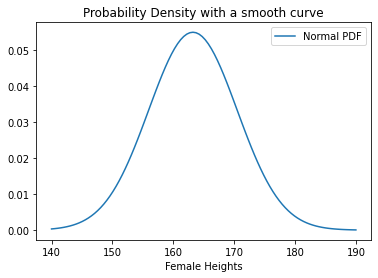

In [190]:
# creating instance of stats.norm class and initialize object with mean = 100 and std = 15
fh_normal = stats.norm(loc= w_mean, scale= w_std)

#create values for horizontal axis
fh_pdf = np.linspace(140,190,100)

#Plt with vertical(y) values from `normal.pdf(t)`
plt.plot(fh_pdf, fh_normal.pdf(fh_pdf),label='Normal PDF')

plt.title("Probability Density with a smooth curve")
plt.xlabel("Female Heights")
plt.legend()
plt.show()

## 6.2 Kernel Density Estimation
Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE). 

Why is it useful?
* **Visualization**: During exploration phase, I can decide whether CDF or PDF if easier to understand for an audience
* **Interpolation**: An estimated PDF is a way to get from a sample to a model of the population. If you have reason to believe that the population distribution is smooth, you can use KDE to interpolate the density for values that don't appear in the sample. 
* **Simulation**: Simulations are often based on the distribution of a sample. If sample size is small, it might be appropriate to smooth the sample distribution using KDE, which allows the simulation ti explore more possible outcomes, rather than replicating the observed data. 

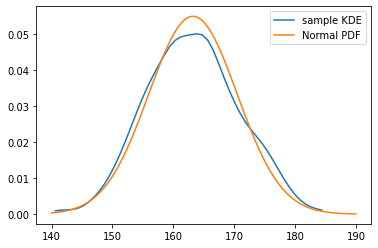

In [233]:
#sample of n=500 from actual distribution for x values
fh_sample = np.random.normal(w_mean, w_std, 500)
fh_sample_x = np.linspace(min(fh_sample), max(fh_sample))

#y-values using #gaussian_kde.evaluate for density values
fh_kde = gaussian_kde(fh_sample)
fh_sample_y = fh_kde.evaluate(fh_sample_x)

plt.plot(fh_sample_x, fh_sample_y, label = "sample KDE")
plt.plot(fh_pdf, fh_normal.pdf(fh_pdf),label='Normal PDF')

plt.legend()
plt.show()

In [ ]:
#trying the sns kde plot, but i don't get it too well
sns.kdeplot(female_heights, bw_method=5)

## 6.3 The distribution framework

We started with PMFs, which represent the probabilities for a discrete set of values. 
* To get from a PMF to a CDF, you add up the probaility (summation) to get cumulative probabilities. 
* To get from a CDF to a PMF, you compute differences (differencing) in cumulative probabilities. 

A PDF if the derivative of a continuous CDF; or equivalently, a CDF is the integral of a PDF. 
* Remember, a PDF maps from values to probability densities; to get a probability, you have to integrate.

To get from a discrete to continuous distribution, you can perform various kinds of smoothing. 
* Ex) assume that the data come from an analytic continuous distribution( like exponential or normal) and to estimate the parameters of that distribution
* Ex) Kernel Density Estimation

Opposite of smoothing is discretizing, or quantizing. 
* If you evaluate a PDF at discrete points, you can generate a PMF that is an approx. of the PDF. You can get a better approx. using numerical integration. 

Will need to distinguish for yourself between continuous and discrete CDFs.
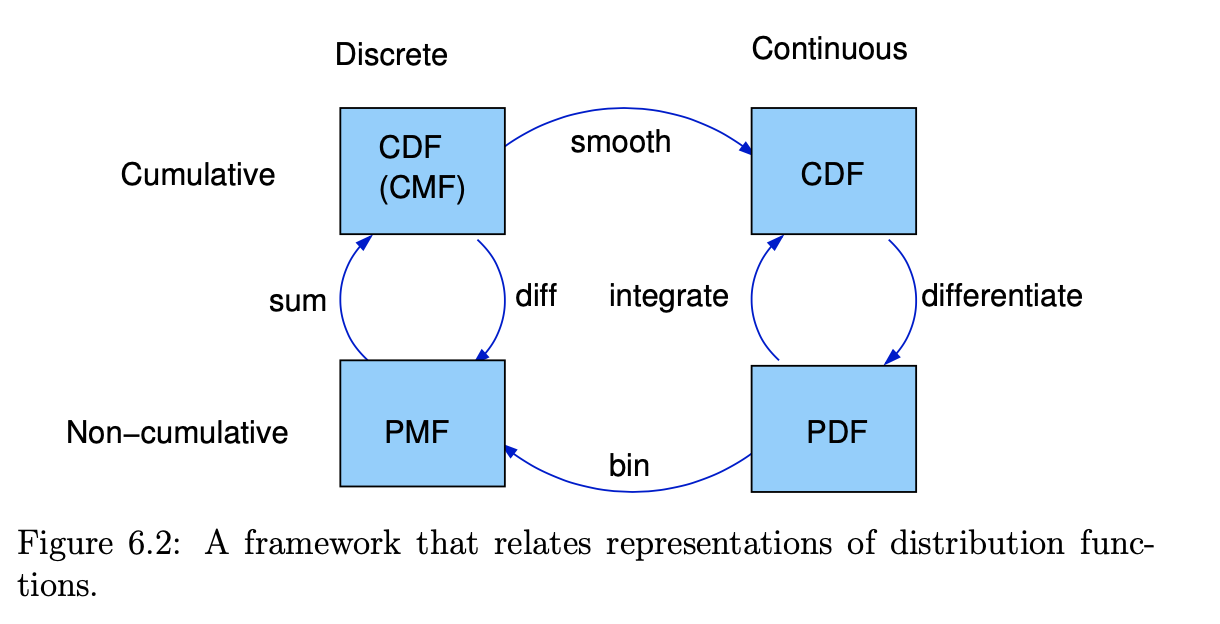

6.7 Moments 

Understand that anytime you take a sample and reduce it to a single number, that number is a statistic. So far: mean, variance, median, and interquartile range.

* Raw Moment: If you have a sample of values, $x_i$, the kth raw moment is (equation where k=1)
    * raw moments are just sums of powers
* Central Moments are more useful. When k=2 the result is the second central moment (variance)
    * central moments are powers of distance from the mean
    * first cental moment approx 0. Second central moment is the variance
* standardized moments: 
    * ratios of central moments, with powers chosen to make the dimensions cancel (without units)
    * third standardized moment is skewness (but heavily relies on outliers which makes it not very robust)

Moment-based statistics reported on units. First moments in, ex, cm. Second moment as cm^2, third moment in cm^3


6.8 Skewness

Skewness is a property that describes the shape of a distribution. If distribution is symmetric around its central tendency, it is unskewed. If values extend farther right or left then "right skewed" or "left skewed". Not a descritption of bias, only describes shape.

How to compute:
* Sample skewness
* Pearson's median skewness coefficient: measure based on the difference between sample mean and median  `g_p = 3(x ̄bar − m)/S`
    * where m = mean, S = std
    * More robust option
